<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/Linear_Ridge_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [87]:
# Generate correlated data
np.random.seed(42)
n_samples = 100

# Independent variables
X1 = np.random.rand(n_samples) * 10
X2 = 2 * X1 + np.random.randn(n_samples)
X3 = -3 * X1 + 0.5 * X2 + np.random.randn(n_samples)

# Dependent variable
y = 3 * X1 + 2 * X2 + 0.5 * X3 + np.random.randn(n_samples) * 2

# Create a DataFrame
data = {'X1': X1, 'X2': X2, 'X3': X3, 'y': y}
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,X1,X2,X3,y
0,3.745401,7.577849,-7.434277,23.072883
1,9.507143,18.715279,-17.710256,55.896425
2,7.319939,14.731640,-14.858655,44.133374
3,5.986585,9.985601,-10.246785,32.036936
4,1.560186,2.900701,-2.604541,9.406725


In [88]:
features = df.drop(columns='y', axis=1)
target = df['y']

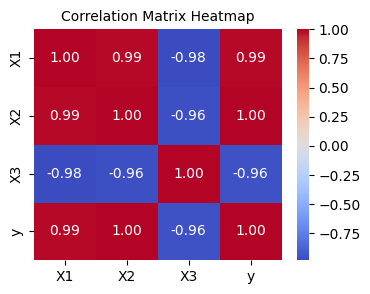

In [89]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(df.T)

# Get the feature names for labeling the heatmap
feature_names = df.columns

# Create a heatmap using Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=feature_names, yticklabels=feature_names)
plt.title("Correlation Matrix Heatmap", fontsize=10)
plt.show()


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=21)

# Standardize the features for Ridge and Lasso Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
simple_lr = LinearRegression()
ridge_lr = Ridge(alpha=0.1)
lasso_lr = Lasso(alpha=0.1)  # Initialize Lasso model with alpha parameter

# Fit models
simple_lr.fit(X_train, y_train)
ridge_lr.fit(X_train_scaled, y_train)
lasso_lr.fit(X_train_scaled, y_train)  # Fit Lasso model

# Make predictions
y_train_pred_simple = simple_lr.predict(X_train)
y_test_pred_simple = simple_lr.predict(X_test)

y_train_pred_ridge = ridge_lr.predict(X_train_scaled)
y_test_pred_ridge = ridge_lr.predict(X_test_scaled)

y_train_pred_lasso = lasso_lr.predict(X_train_scaled)  # Predict with Lasso model
y_test_pred_lasso = lasso_lr.predict(X_test_scaled)  # Predict with Lasso model

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

train_metrics_simple = calculate_metrics(y_train, y_train_pred_simple)
test_metrics_simple = calculate_metrics(y_test, y_test_pred_simple)

train_metrics_ridge = calculate_metrics(y_train, y_train_pred_ridge)
test_metrics_ridge = calculate_metrics(y_test, y_test_pred_ridge)

train_metrics_lasso = calculate_metrics(y_train, y_train_pred_lasso)  # Calculate Lasso metrics
test_metrics_lasso = calculate_metrics(y_test, y_test_pred_lasso)  # Calculate Lasso metrics

# Calculate VAF
def calculate_vaf(y_true, y_pred):
    var_y_true = np.var(y_true)
    vaf = (1 - (np.var(y_true - y_pred) / var_y_true)) * 100
    return vaf

vaf_simple_train = calculate_vaf(y_train, y_train_pred_simple)
vaf_simple_test = calculate_vaf(y_test, y_test_pred_simple)

vaf_ridge_train = calculate_vaf(y_train, y_train_pred_ridge)
vaf_ridge_test = calculate_vaf(y_test, y_test_pred_ridge)

vaf_lasso_train = calculate_vaf(y_train, y_train_pred_lasso)  # Calculate Lasso VAF
vaf_lasso_test = calculate_vaf(y_test, y_test_pred_lasso)  # Calculate Lasso VAF

# Create a DataFrame for the results
results_data = {
    'Metric': ['MSE', 'MAE', 'R-squared', 'VAF'],
    'LR (Train)': list(train_metrics_simple) + [vaf_simple_train],
    'LR (Test)': list(test_metrics_simple) + [vaf_simple_test],
    'RR (Train)': list(train_metrics_ridge) + [vaf_ridge_train],
    'RR (Test)': list(test_metrics_ridge) + [vaf_ridge_test],
    'Lasso (Train)': list(train_metrics_lasso) + [vaf_lasso_train],
    'Lasso (Test)': list(test_metrics_lasso) + [vaf_lasso_test]  # Include Lasso results
}

results_df = pd.DataFrame(results_data)

# Print the results
results_df

,Metric,LR (Train),LR (Test),RR (Train),RR (Test),Lasso (Train),Lasso (Test)
0,MSE,2.728223,1.683452,2.731835,1.679945,2.841205,2.018792
1,MAE,1.295315,1.127291,1.294710,1.125199,1.334116,1.173487
2,R-squared,0.991125,0.994568,0.991113,0.994579,0.990757,0.993486
3,VAF,99.112487,99.457062,99.111312,99.458226,99.075733,99.355641


In [91]:
# Display model parameters
simple_lr_params = {
    'Intercept': simple_lr.intercept_,
    'Coefficients': simple_lr.coef_
}

ridge_lr_params = {
    'Intercept': ridge_lr.intercept_,
    'Coefficients': ridge_lr.coef_
}

lasso_lr_params = {
    'Intercept': lasso_lr.intercept_,
    'Coefficients': lasso_lr.coef_
}

print("Simple Linear Regression Model Parameters:")
print(simple_lr_params)

print("\nRidge Regression Model Parameters:")
print(ridge_lr_params)

print("\nLasso Regression Model Parameters:")
print(lasso_lr_params)

Simple Linear Regression Model Parameters:
{'Intercept': 0.0806479922283998, 'Coefficients': array([2.09271829, 2.26325199, 0.29267326])}

Ridge Regression Model Parameters:
{'Intercept': 29.715949865369122, 'Coefficients': array([ 6.2004269 , 12.83525383,  1.6062974 ])}

Lasso Regression Model Parameters:
{'Intercept': 29.715949865369122, 'Coefficients': array([ 3.41413747, 13.97209135, -0.        ])}


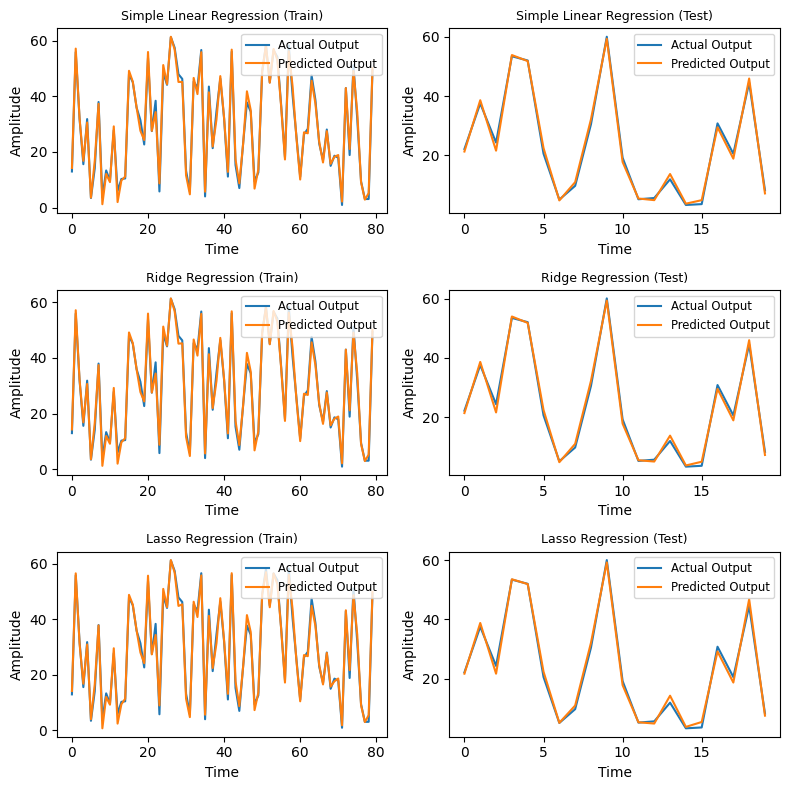

In [92]:
# Function to plot actual vs. estimated responses
def plot_predictions_subplot(y_true, y_pred, title, ax):
    x_values = np.arange(len(y_true))  # Create an array of length of y_true
    ax.plot(x_values, y_true, label='Actual Output')
    ax.plot(x_values, y_pred, label='Predicted Output')
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")
    ax.set_title(title, fontsize=9)  # Reduced title font size
    ax.legend(loc='upper right', fontsize='small')  # Smaller legend in top-right corner

# Create subplots for training and testing cases
fig, axes = plt.subplots(3, 2, figsize=(8, 8))  # Changed figsize to accommodate 3x2 subplots

# Plot Linear Regression results
plot_predictions_subplot(y_train, y_train_pred_simple, "Simple Linear Regression (Train)", axes[0, 0])
plot_predictions_subplot(y_test, y_test_pred_simple, "Simple Linear Regression (Test)", axes[0, 1])

# Plot Ridge Regression results
plot_predictions_subplot(y_train, y_train_pred_ridge, "Ridge Regression (Train)", axes[1, 0])
plot_predictions_subplot(y_test, y_test_pred_ridge, "Ridge Regression (Test)", axes[1, 1])

# Plot Lasso Regression results
plot_predictions_subplot(y_train, y_train_pred_lasso, "Lasso Regression (Train)", axes[2, 0])
plot_predictions_subplot(y_test, y_test_pred_lasso, "Lasso Regression (Test)", axes[2, 1])

plt.tight_layout()
plt.show()
